In [1]:
from QHD import *

import matplotlib.pyplot as plt
import numpy as np

# The Double Well Potential

**1. The Potential**

We first must define the potential along with its parameters, as described below.

**Parameters**

$m=1836$ This is mass

$\lambda=m$ This is a constant which can be set equal to the mass, `m`, or any other value

$B=2$ This is simply a constant which can be changed as well




**Potential**

$V(q)=m*\lambda*(q^2 - B)^2$

In [27]:
m = lam = 1836
B = 2
q = np.linspace(-5, 5, 1000)

potential = m*lam*(q**2 - B)**2 

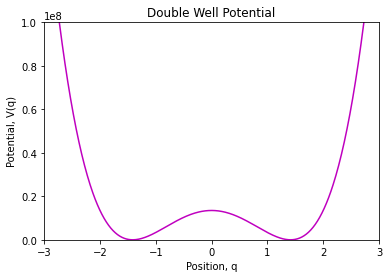

In [31]:
plt.plot(q, potential, "m")
plt.title("Double Well Potential")
plt.ylabel("Potential, V(q)")
plt.xlabel("Position, q")
plt.ylim(0, 1e8)
plt.xlim(-3, 3)
plt.savefig('doublewell_vVq.png')
plt.show()

New potential given by: https://web.physics.ucsb.edu/~davidgrabovsky/files-teaching/Double%20Well%20Solutions.pdf

And this one: https://arxiv.org/pdf/math-ph/0611033.pdf#:~:text=Ammonia%20(NH3)%2C%20cyanamide%20(,can%20tunnel%20through%20the%20barrier.

### 2. Derivation of  QHD formulas

Here, we use the pysces library, able to derive the equations of motion in the QHD method. We will need to define the `q`, `p`, and `p2` variables. In order to do this, we must first calculate the first and second derivatives of the potential of interest, defined in section 1. We will also use a change of variables as well, described below.

Please note that because the potential is quadratic, we do not need a change of variables. 

**2.1 The First and Second Derivatives of the Potential**

To take the derivatives, we must represent the potential symbollically. This can be done by:

In [32]:
# First, we must define all the parameters as stated in section 1 as symbols:

m, q, B = symbols("m, q, B")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = m*(q**2 - B)**2

Now that the potential is represented symbolically, we may take the first and second derivatives, described by diff1 and diff2, respectively

In [33]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

**2.2 Solving for the Equations of Motion**

In [35]:
# Again, we must first define all variables as symbols. #

q, p, x, x2, xp, dt, mass, alpha, D = symbols("q, p, x, x2, xp, dt, mass, alpha, D")



########## EOM Calculations ##########

q1 = QHD_int(q, 1, dt)

#print(q1)

p1 = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff1)))

#print(p1)

p21 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff2)).replace("Derivative(v(q), q)", str(diff1)))

#print(p21)

Now, we are ready to make plots of the data based on the EOM's as computed above.

# 3. Graphing

**3.1 Generating Time-Dependent Values**

We will first define all of the parameters necessary to perform the QHD calculations, starting with the potential specific parameters. These parameters are also defined in part 1.

In [36]:
### Parameters: ###

q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0

#omega = 1/2000*10**8 # angstrom (-1)
#m = 1/1836 # mass au
#D = 1/2000*10**8 # angstrom (-1)
#C = 0
#B = ((m*omega**2)/4)
#A = (B**2/(4*D))


m = 1836
mass = 1836
B = 2

hbar = 0.6582  # eV * fs

q_list = []
y_list = []
y_list1 = []
y_list2 = []

Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,p2,x,x2,xp = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2

In [38]:
### Time how long it takes to compute ###

import time 
begin = time.time()


### Compute the y values ###

dt = 0.1
t_i = 0.0
t_f = 1000

y_list = []

while t_i <= t_f: 
    q = eval(str(q1))

    p = eval(str(p1))

    p2 = eval(str(p21))
    
    Ekin_cl = 0.5*p**2/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = m*lam*(q**2 - B)**2 
    Epot    = Epot_cl
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

#    Etot0 = Etot
    
#    Etot1 = Etot/Etot0
    
#    y_list.append(Etot1)
    y_list1.append(Etot)
    y_list2.append(Etot_cl)
    
    q_list.append(q)
    
    t_i = t_i + dt

    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Total runtime is 12.243994235992432


For the x values, we create a range with `(t_i, t_f, dt)` as the parameters. Due to the increasing nature of `t_i`, the initial value of `0.0` is used in its place.

In [39]:
x_list = np.arange(0, t_f, dt)

**3.2 Graphing Position versus Time**

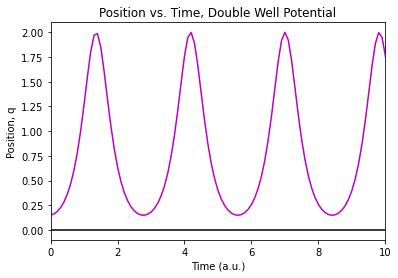

In [25]:
x_list = np.arange(0, 1000, 0.1)
plt.plot(x_list, q_list, "m")
plt.plot([0, 1000], [0, 0], "k-")
plt.title("Position vs. Time, Double Well Potential")
plt.xlim(0, 10)
plt.xlabel("Time (a.u.)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
plt.savefig('doublewell_qVt.png')
plt.show()

**3.3 Energy versus Time**

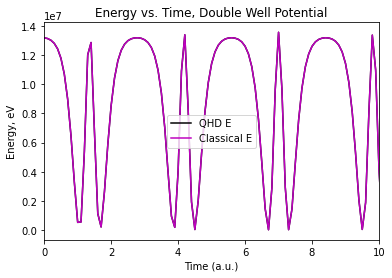

In [20]:
#plt.plot(x_list, y_list)
plt.plot(x_list, y_list1, "k")
plt.plot(x_list, y_list2, "m")
plt.legend(["QHD E", "Classical E"])
#plt.plot([0, 500], [0, 0], "k-")
plt.title("Energy vs. Time, Double Well Potential")
plt.xlim(0, 10)
plt.xlabel("Time (a.u.)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Energy, eV")
plt.savefig('doublewell_eVt.png')
plt.show()

Note that because this is a quadratic function, the classical energy is equivalent to the QHD energy.

**2.1 The x expressions**

In [4]:
### I don't think there needs to be a change of variables for this system ###

**2.2 The q expression**

In [17]:
q, p, mass, dt = symbols("q p mass, dt")

print("q = " + str(QHD_int(q, 1, dt)))

q = dt*p/mass + q


**2.3 Taking the derivative in Python**

In [44]:
### Define the potential ###
m, q, B = symbols("m, q, B")
pot = m*(q**2 - B)**2

pot

In [45]:
diff1 = diff(pot, q)
diff2 = diff(diff1, q)

diff1, diff2

**2.4 The p expressions**

In [48]:
p,x,x2,dt,mass,alpha,D = symbols("p,x,x2,dt,mass,alpha,D")

QHD_p = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff11)))

print("p = " + str(QHD_p) + "\n")

QHD_p2 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff22)).replace("Derivative(v(q), q)", str(diff11)))

print("p2 = " + str(QHD_p2) + "\n")

p = -4*dt*m*q*(-B + q**2) + p

p2 = dt*(16.0*m*p*q*(-B + q**2) + 16.0*m*q**2 + 4*m*(-B + q**2)) + p**2



**2.5 Testing Generalizability**

In [49]:
q, p, x, x2, xp, dt, mass, alpha, D = symbols("q, p, x, x2, xp, dt, mass, alpha, D")

q1 = QHD_int(q, 1, dt)

#print(q1)

x1 = QHD_int(x, 1, dt)

#print(x1)

x21 = QHD_int(x, 2, dt)

#print(x21)

xp1 = QHD_int(xp, 1, dt)

#print(xp1)

p1 = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff11)))

print(p1)

p21 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff22)).replace("Derivative(v(q), q)", str(diff11)))

print(p21)

-4*dt*m*q*(-B + q**2) + p
dt*(16.0*m*p*q*(-B + q**2) + 16.0*m*q**2 + 4*m*(-B + q**2)) + p**2


### 3. Plot position versus time

In [50]:
### Cell below runs forever... Something isn't right! ###

In [82]:
### Time how long it takes to compute ###

import time 
begin = time.time()

### Parameters: ###

q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0

#omega = 1/2000*10**8 # angstrom (-1)
#m = 1/1836 # mass au
#D = 1/2000*10**8 # angstrom (-1)
#C = 0
#B = ((m*omega**2)/4)
#A = (B**2/(4*D))


m = 1836
mass = 1836
B = 2

hbar = 0.6582  # eV * fs

q_list = []
y_list = []
y_list1 = []
y_list2 = []

Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,p2,x,x2,xp = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2



### Compute the y values ###

dt = 0.1
t = 0.0
T = 1000

y_list = []

while t <= T: 
    q = eval(str(q1))

    p = eval(str(p1))

    p2 = eval(str(p21))
    
    Ekin_cl = 0.5*p**2/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = D*(exp(-2.0*alpha*q) - 2.0*exp(-alpha*q))
    Epot    = D*(x2 - 2.0*x)
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

    Etot0 = Etot
    
    Etot1 = Etot/Etot0
    
    y_list.append(Etot1)
    y_list1.append(Etot)
    y_list2.append(Etot_cl)
    
    q_list.append(q)
    
    t = t + dt

    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Total runtime is 115.1435227394104


In [83]:
### The above cell usually takes a minute or so to run ###

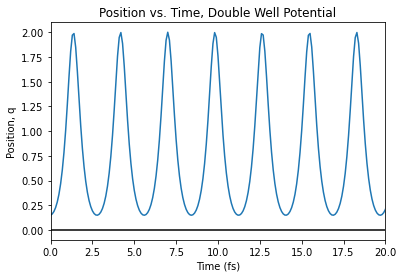

In [84]:
### Define the x values ###

x_list = np.arange(0, 1000, 0.1)
plt.plot(x_list, q_list)
plt.plot([0, 500], [0, 0], "k-")
plt.title("Position vs. Time, Double Well Potential")
plt.xlim(0, 20)
plt.xlabel("Time (fs)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
plt.savefig('doublewell_qVt.png')
plt.show()

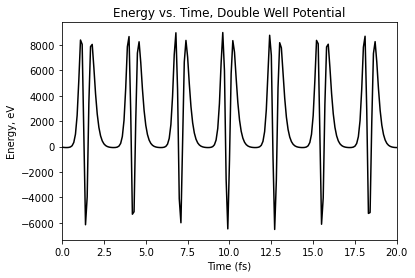

In [102]:
### Define the x values ###

x_list = np.arange(0, 1000, 0.1)
#plt.plot(x_list, y_list)
plt.plot(x_list, y_list1, "k")
#plt.plot(x_list, y_list2, "m")
#plt.legend(["E/E_0", "E", "E_0"])
#plt.plot([0, 500], [0, 0], "k-")
plt.title("Energy vs. Time, Double Well Potential")
plt.xlim(0, 20)
plt.xlabel("Time (fs)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Energy, eV")
plt.savefig('doublewell_eVt.png')
plt.show()

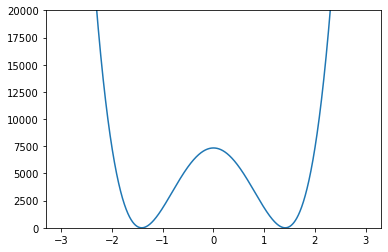

In [58]:
def double_well_potential(m, B):
    return m*(q**2 - B)**2 

m = 1836
B = 2


q = np.linspace(-3, 3, 10000)
plt.plot(q, double_well_potential(m, B))
plt.ylim(0, 20000)